In [1]:
import numpy as np
import time
from imageio import imread
import matplotlib.pyplot as plt

from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage.filters import convolve
from skimage.draw import circle
from skimage.transform import resize
from functools import partial

(128, 128)


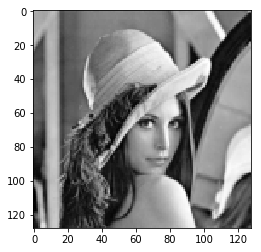

In [2]:
im = imread("../../samples/lena.jpg", pilmode="L")
im = resize(im, (128, 128), order=1, anti_aliasing=True, mode="reflect") 
im = (im*255).astype(np.uint8)
plt.imshow(im, cmap="gray")
print(im.shape)
plt.show()

# Exercise 4: Filtering in Frequency Domain

The Fourier transformation in the descrete domain is defined as:

$$
\begin{align}
F(u,v)
    &= \sum_{x=0}^{M}\sum_{y=0}^{N}f(x,y) \cdot e^{-2i\pi\cdot\left(\dfrac{u \cdot x}{M} + \dfrac{v \cdot y}{N} \right)} \\
    &= \sum_{x=0}^{M}\sum_{y=0}^{N} \dfrac{f(x,y)}{e^{2i\pi\cdot\left(\dfrac{u \cdot x}{M} + \dfrac{v \cdot y}{N} \right)}} \\
e^{i \cdot \rho \cdot x} 
    &= \mathrm{cos}(\rho \cdot x) + i\cdot \mathrm{sin}(\rho \cdot x)
\end{align}
$$




## Task 1 - (Fast) Fourier Transform

Implement a functions, that performs the **Fourier Transformation** of an arbitrary image. **Visualize** the amplitude and the phase of the resulting Fourier Representation. (*hint: use <code>np.log</code> when visualizing the amplitude*)

In [3]:
def normalize(im):
    """
        Small helper function for image renormalization
    """
    im = im.astype(np.float32)
    im -= im.min()
    im /= im.max()
    return im
    

def DFT(im, shift=False):
    if im.dtype == np.uint8:
        im = im.astype(np.float) / 255
    
    I = fft2(im)
    if shift:
        I = fftshift(I)
    
    return I

def iDFT(I, shift=False, norm=False):
    if shift:
        I = ifftshift(I)
    
    im = ifft2(I)
    if norm:
        im = normalize(im.real)
    else:
        im = im.real
    im = np.round(im * 255)
    
    return im.astype(np.uint8)

/home/korsch/.anaconda3/envs/chainer4/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


True


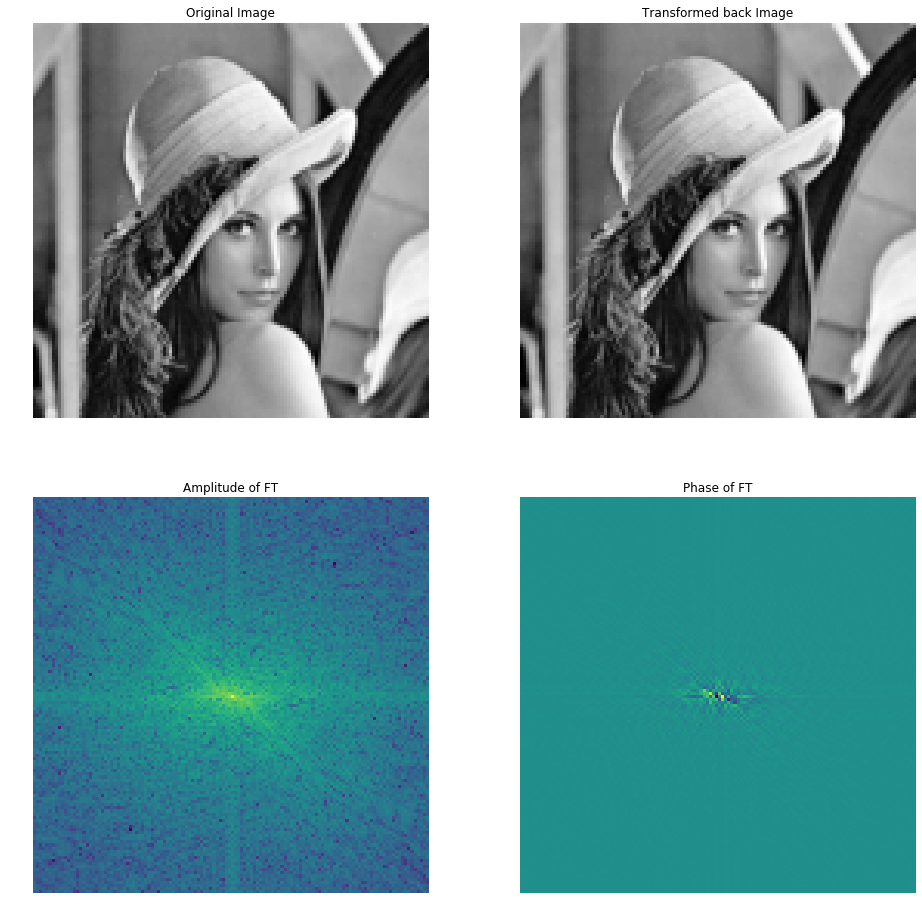

In [9]:
I = DFT(im, shift=True)

new_I = I.copy()
# new_I.imag[:] = 0

new_im = iDFT(new_I, shift=True)

print(np.allclose(new_im, im))

fig, axs = plt.subplots(2, 2, figsize=(16,16))



axs[0,0].imshow(im, cmap=plt.cm.gray)
axs[0,0].set_title("Original Image")
axs[0,0].axis("off")

axs[0,1].imshow(new_im, cmap=plt.cm.gray)
axs[0,1].set_title("Transformed back Image")
axs[0,1].axis("off")

axs[1,0].imshow(normalize(np.log(I).real))
axs[1,0].set_title("Amplitude of FT")
axs[1,0].axis("off")

axs[1,1].imshow(normalize((I).imag))
axs[1,1].set_title("Phase of FT")
axs[1,1].axis("off")

plt.show()

In [1]:
np.arange(256)

NameError: name 'np' is not defined